<center>
<img src="../../img/ods_stickers.jpg">
## Открытый курс по машинному обучению. Сессия № 3
Авторы материала: Юрий Кашницкий (@yorko) и Максим Уваров (@maxis42). Материал распространяется на условиях лицензии [Creative Commons CC BY-NC-SA 4.0](https://creativecommons.org/licenses/by-nc-sa/4.0/). Можно использовать в любых целях (редактировать, поправлять и брать за основу), кроме коммерческих, но с обязательным упоминанием автора материала.

# <center>Домашнее задание № 3 
## <center> Деревья решений для классификации и регрессии

**В этом задании мы разберемся с тем, как работает дерево решений в задаче регрессии, а также построим (и настроим) классифицирующие деревья решений в задаче прогнозирования сердечно-сосудистых заболеваний. 
Заполните код в клетках (где написано "Ваш код здесь") и ответьте на вопросы в [веб-форме](https://docs.google.com/forms/d/1bXgaJRh4naJOGzE_Li2k50TN0kOPJdNhMtHl6H4t3Lk/edit).**

In [39]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier, export_graphviz

## 1. Простой пример восстановления регрессии с помощью дерева решений

Рассмотрим следующую одномерную задачу восстановления регрессии. Неформально, надо построить функцию $a(x)$, приближающую искомую зависимость $y = f(x)$ в терминах среднеквадратичной ошибки: $min \sum_i {(a(x_i) - f(x_i))}^2$. Подробно мы рассмотрим эту задачу в следующий раз ([4-я статья курса](https://habrahabr.ru/company/ods/blog/323890/)), а пока поговорим о том, как решать эту задачу с помощью дерева решений. Предварительно прочитайте небольшой раздел ["Дерево решений в задаче регрессии"](https://habrahabr.ru/company/ods/blog/322534/#derevo-resheniy-v-zadache-regressii) 3-ей статьи курса. 

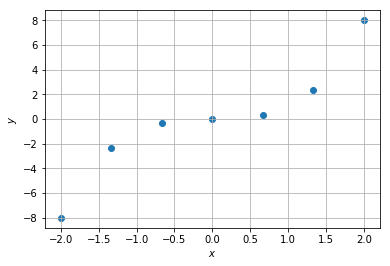

In [40]:
X = np.linspace(-2, 2, 7)
y = X ** 3

plt.scatter(X, y)
plt.grid()
plt.xlabel(r'$x$')
plt.ylabel(r'$y$');

Проделаем несколько шагов в построении дерева решений. Исходя из соображений симметрии, выберем пороги для разбиения равными соответственно 0, 1.5 и -1.5. Напомним, что в случае задачи восстановления регрессии листовая вершина выдает среднее значение ответа по всем объектам обучающей выборки, попавшим в эту вершину.

Итак, начнём. Дерево глубины 0 состоит из одного корня, который содержит всю обучающую выборку. Как будут выглядеть предсказания данного дерева для $x \in [-2, 2]$? Постройте соответствующий график. Тут без `sklearn` – разбираемся просто с ручкой, бумажкой и Python, если надо.

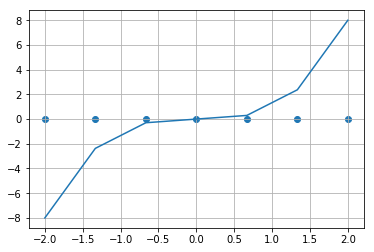

In [41]:
plt.scatter(X, np.zeros(shape=X.shape))
plt.plot(X, y)
plt.grid()

Произведем первое разбиение выборки по предикату $[x < 0]$. Получим дерево глубины 1 с двумя листьями. Постройте аналогичный график предсказаний для этого дерева.

In [42]:
# class Node:
#     def __init__(self, x=None):
#         self.left = None
#         self.right = None
#         self.X = x
#         self.y = x**3
        
#     def dispersion(self):
#         return ((self.y - self.y.mean())**2).mean()
    
#     def value(self):
#         return self.y.mean()
        

# class MyDecTree:
#     threshold = []
#     __queue = list()
    
#     def __init__(self, x):
#         self.root = Node(x)
        
#     def fit(self):
#         if len(self.threshold) < 1:
#             return None
#         else:
#             que = self.queue
#             que.insert(self.root)
#             level = 0
            
#             while len(que) != 0:
#                 p = que.pop[0] # pop first
#                 if p.left & p.right:     # p have childs
#                     que.insert(p.left)
#                     que.insert(p.right)
#                 else:
#                     t = self.threshold[level]
#                     p.left = Node(p.X[p.X < t])
#                     p.right = Node(p.X[p.X >= t])
                    
# tr = MyDecTree(X)
# tr.threshold.append([0,])


In [43]:
class Node:
    def __init__(self, x=None):
        self.left = None
        self.right = None
        self.X = x
        self.y = x**3
        
    def dispersion(self):
        return ((self.y - self.y.mean())**2).mean()
    
    def value(self):
        return self.y.mean()
    
    def fit(self, t):
        """t - threshold"""
        p = self # pointer
        p.left = Node(p.X[p.X < t])
        p.right = Node(p.X[p.X >= t])
        

class MyDecTree:
    threshold = []
    
    def __init__(self, x):
        self.root = Node(x)
        
    def value_for(self):
        pass
#     def fit(self):
#         if len(self.threshold) < 1:
#             return None
#         else:
#             p = self.root # pointer
#             thres = self.threshold
#             for t in thres: # incorrect: it mast gets deep round
#                 p.left = Node(p.X[p.X < t])
#                 p.right = Node(p.X[p.X >= t])
                
            

mytree = MyDecTree(X)
mytree.root.fit(-1)

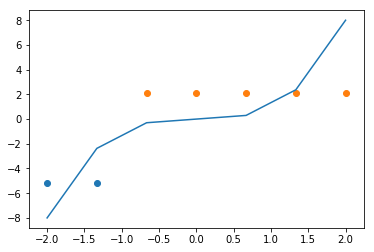

In [44]:
def tree(x):
    y = X.copy()
    print(X[X<0])
    y[y<0] = (y[y<0]**3).mean()
    y[y>=0] = (y[y>=0]**3).mean()
    return y

plt.plot(X,y)

plt.scatter(mytree.root.left.X, np.ones(shape=mytree.root.left.X.shape)*mytree.root.left.value())
plt.scatter(mytree.root.right.X, np.ones(shape=mytree.root.right.X.shape)*mytree.root.right.value())

In [45]:
print(mytree.root.X)
print(mytree.root.y)
print(mytree.root.dispersion())
print("0\n")

print(mytree.root.left.X)
print(mytree.root.left.y)
print(mytree.root.left.dispersion())
print(str(mytree.root.left.value()) + "\n")

print(mytree.root.right.X)
print(mytree.root.right.y)
print(mytree.root.right.dispersion())
print(str(mytree.root.right.value()) + "\n")

[-2.         -1.33333333 -0.66666667  0.          0.66666667  1.33333333
  2.        ]
[-8.         -2.37037037 -0.2962963   0.          0.2962963   2.37037037
  8.        ]
19.916127768
0

[-2.         -1.33333333]
[-8.         -2.37037037]
7.9231824417
-5.18518518519

[-0.66666667  0.          0.66666667  1.33333333  2.        ]
[-0.2962963   0.          0.2962963   2.37037037  8.        ]
9.65706447188
2.07407407407



В алгоритме построения дерева решений признак и значение порога, по которым происходит разбиение выборки, выбираются исходя из некоторого критерия. Для регрессии обычно используется дисперсионный критерий:
$$Q(X, j, t) = D(X) - \dfrac{|X_l|}{|X|} D(X_l) - \dfrac{|X_r|}{|X|} D(X_r),$$
где $X$ – выборка, находящаяся в текущей вершине, $X_l$ и $X_r$ – разбиение выборки $X$ на две части по предикату $[x_j < t]$ (то есть по $j$-ому признаку и порогу $t$), $|X|$, $|X_l|$, $|X_r|$ - размеры соответствующих выборок, а $D(X)$ – дисперсия ответов на выборке $X$:
$$D(X) = \dfrac{1}{|X|} \sum_{x_j \in X}(y_j – \dfrac{1}{|X|}\sum_{x_i \in X}y_i)^2,$$
где $y_i = y(x_i)$ – ответ на объекте $x_i$. При каждом разбиении вершины выбираются признак $j$ и значение порога $t$, максимизирующие значение функционала $Q(X, j, t)$.

В нашем случае признак всего один, поэтому $Q$ зависит только от значения порога $t$ (и ответов выборки в данной вершине). 

Постройте график функции $Q(X, t)$ в корне в зависимости от значения порога $t$ на отрезке $[-1.9, 1.9]$.

In [46]:
def regression_var_criterion(tree, SIZE, t):
    tree.root.fit(t)
    r = tree.root
    left = r.left
    right = r.right
    return r.dispersion() - (np.size(left.y)/SIZE)*(left.dispersion()) - (np.size(right.y)/SIZE)*(right.dispersion())
    

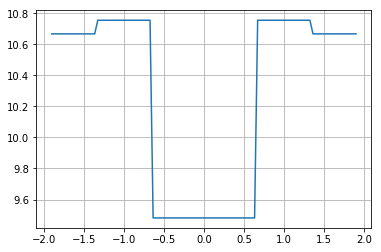

In [47]:
tarr = np.linspace(-1.9, 1.9, 100)

SIZE = np.size(X)
tree = MyDecTree(X)

res = np.array([])
for t in tarr:
    res = np.append(res, regression_var_criterion(tree, SIZE, t))
    
plt.grid()
plt.plot(tarr, res)
    

**<font color='red'>Вопрос 1.</font> Оптимально ли с точки зрения дисперсионного критерия выбранное нами значение порога $t = 0$?**
- Да
- <font color='green'>**Нет +**</font>

Теперь произведем разбиение в каждой из листовых вершин. В левой (соответствующей ветви $x < 0$) – по предикату $[x < -1.5]$, а в правой (соответствующей ветви $x \geqslant 0$) – по предикату $[x < 1.5]$. Получится дерево глубины 2 с 7 вершинами и 4 листьями. Постройте график предсказаний этого дерева для $x \in [-2, 2]$.

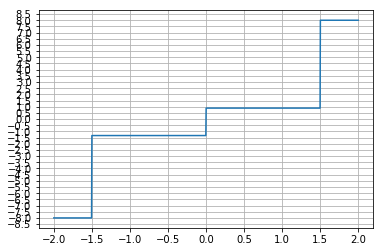

In [48]:
an_tree = MyDecTree(X)
an_tree.root.fit(0)
an_tree.root.left.fit(-1.5)
an_tree.root.right.fit(1.5)

r = an_tree.root

newX = np.linspace(-2,2,1000)
newY = np.array([])
for x in newX:
    if (x < 0) & (x < -1.5):
        newY = np.append(newY, r.left.left.value())
        continue
        
    if (x < 0) & (x >= -1.5):
        newY = np.append(newY, r.left.right.value())
        continue
        
    if (x >= 0) & (x < 1.5):
        newY = np.append(newY, r.right.left.value())
        continue
        
    if (x >= 0) & (x >= 1.5):
        newY = np.append(newY, r.right.right.value())
        continue

# ll = np.ones(shape=an_tree.root.left.left.X.shape)*an_tree.root.left.left.value()
# lr = np.ones(shape=an_tree.root.left.right.X.shape)*an_tree.root.left.right.value()
# rl = np.ones(shape=an_tree.root.right.left.X.shape)*an_tree.root.right.left.value()
# rr = np.ones(shape=an_tree.root.right.right.X.shape)*an_tree.root.right.right.value()

# newX = np.concatenate((r.left.left.X, r.left.right.X, r.right.left.X, r.right.right.X))
# newY = np.concatenate((ll, lr, rl, rr))

plt.xticks(np.arange(min(newX)-1, max(newX)+1, 0.5))
plt.yticks(np.arange(min(newY)-1, max(newY)+1, 0.5))

plt.rcParams['figure.figsize'] = (30,2)
plt.grid()
plt.plot(newX, newY);

**<font color='red'>Вопрос 2.</font> Из какого числа отрезков состоит график (необходимо считать как горизонтальные, так и вертикальные прямые), изображающий предсказания построенного дерева на отрезке [-2, 2]?**
- 5
- 6
- **+7**
- 8

## 2. Построение дерева решений для прогноза сердечно-сосудистых заболеваний
Считаем в `DataFrame` знакомый нам набор данных по сердечно-сосудистым заболеваниям. 

In [53]:
df = pd.read_csv('../../data/mlbootcamp5_train.csv', 
                 index_col='id', sep=';')

In [54]:
df.head(8)

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
id,,,,,,,,,,,,
0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,17474,1,156,56.0,100,60,1,1,0,0,0,0
8,21914,1,151,67.0,120,80,2,2,0,0,0,0
9,22113,1,157,93.0,130,80,3,1,0,0,1,0
12,22584,2,178,95.0,130,90,3,3,0,0,1,1


Сделайте небольшие преобразования признаков: постройте признак "возраст в годах" (полных лет), а также постройте по 3 бинарных признака на основе `cholesterol` и `gluc`, где они, соответственно, равны 1, 2 или 3. Эта техника называется dummy-кодированием или One Hot Encoding (OHE), удобней всего в данном случае использовать `pandas.get_dummmies`. Исходные признаки `cholesterol` и `gluc` после кодирования использовать не нужно.

In [55]:
df["age"] = np.floor(df["age"] / 365.25)
df["age"] = df["age"].astype("int")

In [56]:
df = pd.concat([df, pd.get_dummies(df['cholesterol'], prefix="ch")], axis=1)
df = pd.concat([df, pd.get_dummies(df['gluc'], prefix="gl")], axis=1)

In [57]:
df.drop(['gluc', 'cholesterol'], axis=1, inplace=True)
df.head(6)

,age,gender,height,weight,ap_hi,ap_lo,smoke,alco,active,cardio,ch_1,ch_2,ch_3,gl_1,gl_2,gl_3
id,,,,,,,,,,,,,,,,
0,50,2,168,62.0,110,80,0,0,1,0,1,0,0,1,0,0
1,55,1,156,85.0,140,90,0,0,1,1,0,0,1,1,0,0
2,51,1,165,64.0,130,70,0,0,0,1,0,0,1,1,0,0
3,48,2,169,82.0,150,100,0,0,1,1,1,0,0,1,0,0
4,47,1,156,56.0,100,60,0,0,0,0,1,0,0,1,0,0
8,59,1,151,67.0,120,80,0,0,0,0,0,1,0,0,1,0


Разбейте выборку на обучающую и отложенную (holdout) части в пропорции 7/3. Для этого используйте метод `sklearn.model_selection.train_test_split`, зафиксируйте у него `random_state`=17.

In [58]:
y = df['cardio']
y_cardio = df['cardio']
df.drop('cardio', axis=1, inplace=True)

X_train, X_valid, y_train, y_valid = train_test_split(df.values, y, test_size=0.3, random_state=17)

Обучите на выборке `(X_train, y_train)` дерево решений с ограничением на максимальную глубину в 3. Зафиксируйте у дерева `random_state=17`. Визуализируйте дерево с помошью `sklearn.tree.export_graphviz`, `dot` и `pydot`. Пример дан в [статье](https://habrahabr.ru/company/ods/blog/322534/) под спойлером "Код для отрисовки дерева". Названия файлов писать без кавычек, для того чтобы работало в jupyter notebook. Обратите внимание, что команды в Jupyter notebook, начинающиеся с восклицательного знака – это терминальные команды (которые мы обычно запускаем в терминале/командной строке).

In [59]:
tree = DecisionTreeClassifier(max_depth=3, random_state=17) # инициализировали объект

In [60]:
%%time
tree.fit(X_train, y_train)

CPU times: user 40 ms, sys: 2.37 ms, total: 42.4 ms
Wall time: 40.7 ms


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=17,
            splitter='best')

In [61]:
export_graphviz(tree, out_file='../../img/hw_tree.dot', filled=True, feature_names=df.columns)

!rm ../../img/hw_tree.png
!dot -Tpng ../../img/hw_tree.dot -o ../../img/hw_tree.png
!rm ../../img/hw_tree.dot

<img src='../../img/hw_tree.png'>

**<font color='red'>Вопрос 3.</font> Какие 3 признака задействуются при прогнозе в построенном дереве решений? (то есть эти три признака "можно найти в дереве")**
- weight, height, gluc=3
- smoke, age, gluc=3
- age, weight, chol=3
- **+ age, ap_hi, chol=3**

Сделайте с помощью обученного дерева прогноз для отложенной выборки `(X_valid, y_valid)`. Посчитайте долю верных ответов (accuracy).

In [62]:
from sklearn.metrics import accuracy_score

In [63]:
y_test = tree.predict(X_valid)

In [64]:
acc1 = accuracy_score(tree.predict(X_valid), y_valid)
acc1

0.72128571428571431

In [65]:
tree_with_best_param = DecisionTreeClassifier(random_state=17, max_depth=6)
tree_with_best_param.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=6,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=17,
            splitter='best')

In [66]:
y_result_with_best_param = tree_with_best_param.predict(X_valid)

In [67]:
acc_with_bp = accuracy_score(y_result_with_best_param, y_valid)
acc_with_bp

0.72566666666666668

Теперь на кросс-валидации по выборке  `(X_train, y_train)`  настройте глубину дерева, чтобы повысить качество модели. Используйте GridSearchCV, 5-кратную кросс-валидацию. Зафиксируйте у дерева `random_state`=17. Перебирайте параметр `max_depth` от 2 до 10. 

In [68]:
GridSearchCV?

In [69]:
tree_params = {'max_depth': list(range(2, 11))}

tree_grid = GridSearchCV(tree, tree_params, cv=5, verbose=True)

Нарисуйте график того, как меняется средняя доля верных ответов на кросс-валидации в зависимости от значения `max_depth`.

In [70]:
tree_grid.fit(X_train, y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=1)]: Done  45 out of  45 | elapsed:    2.3s finished


GridSearchCV(cv=5, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=17,
            splitter='best'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=True)

0.732224489796 {'max_depth': 6}


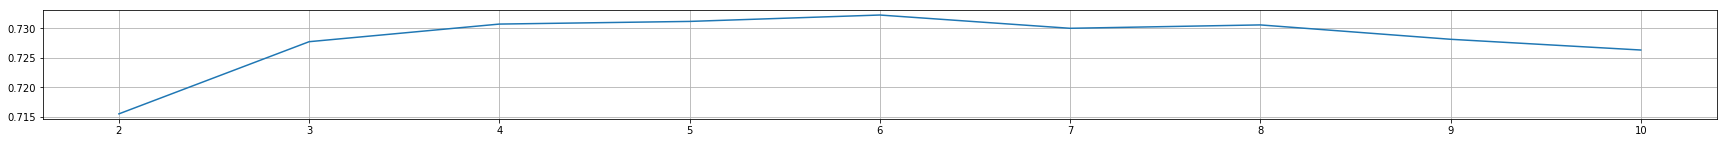

In [71]:
rank_score = tree_grid.cv_results_['mean_test_score']
rank_params_dict = tree_grid.cv_results_['params']

rank_params = []
for p in rank_params_dict:
    rank_params.append(p['max_depth'])
    
    
plt.grid()
plt.plot(rank_params, rank_score)

print(tree_grid.best_score_, tree_grid.best_params_)

Выведите лучшее значение `max_depth`, то есть такое, при котором среднее значение метрики качества на кросс-валидации максимально. Посчитайте также, какова теперь доля верных ответов на отложенной выборке. Все это можно сделать с помощью обученного экземпляра класса `GridSearchCV`.

In [72]:
y_test_grid = tree_grid.best_estimator_.predict(X_valid)

acc2= accuracy_score(y_test_grid, y_valid)
acc2

0.72566666666666668

In [73]:
(acc2-acc1)/acc1

0.0060738099953786132

**<font color='red'>Вопрос 4.</font> Имеется ли на кривой валидации по максимальной глубине дерева пик `accuracy`, если перебирать `max_depth` от 2 до 10? Повысила ли настройка глубины дерева качество классификации (accuracy) более чем на 1% на отложенной выборке (надо посмотреть на выражение (acc2 - acc1) / acc1 * 100%, где acc1 и acc2 – доли верных ответов на отложенной выборке до и после настройки max_depth соответственно)?**
- да, да
- **да, нет**
- нет, да
- нет, нет

Обратимся опять (как и в 1 домашке) к картинке, демонстрирующей шкалу SCORE для расчёта риска смерти от сердечно-сосудистого заболевания в ближайшие 10 лет.
<img src='../../img/SCORE2007.png' width=70%>

Создайте бинарные признаки, примерно соответствующие этой картинке:
- $age \in [45,50), \ldots age \in [60,65) $ (4 признака)
- верхнее артериальное давление: $ap\_hi \in [120,140), ap\_hi \in [140,160), ap\_hi \in [160,180),$ (3 признака)

Если значение возраста или артериального давления не попадает ни в один из интервалов, то все бинарные признаки будут равны нулю. Далее будем строить дерево решений с этим признаками, а также с признаками ``smoke``, ``cholesterol``  и ``gender``. Из признака ``cholesterol`` надо сделать 3 бинарных, соотв-х уникальным значениям признака ( ``cholesterol``=1,  ``cholesterol``=2 и  ``cholesterol``=3), эта техника называется dummy-кодированием или One Hot Encoding (OHE). Признак ``gender`` надо перекодировать: значения 1 и 2 отобразить на 0 и 1. Признак лучше переименовать в ``male`` (0 – женщина, 1 – мужчина). В общем случае кодирование значений делает ``sklearn.preprocessing.LabelEncoder``, но в данном случае легко обойтись и без него.

Итак, дерево решений строится на 12 бинарных признаках (исходные признаки не берем).

Постройте дерево решений с ограничением на максимальную глубину = 3 и обучите его на всей исходной обучающей выборке. Используйте `DecisionTreeClassifier`, на всякий случай зафикисровав `random_state=17`, остальные аргументы (помимо `max_depth` и `random_state`) оставьте по умолчанию. 

**<font color='red'>Вопрос 5.</font> Какой бинарный признак из 12 перечисленных оказался самым важным для обнаружения ССЗ, то есть поместился в вершину построенного дерева решений?**
- Верхнее артериальное давление от 160 до 180 (мм рт.ст.)
- Пол мужской / женский
- **Верхнее артериальное давление от 140 до 160 (мм рт.ст.)**
- Возраст от 50 до 55 (лет)
- Курит / не курит
- Возраст от 60 до 65 (лет)

In [74]:
df_new = df.copy()
df_new.head()

,age,gender,height,weight,ap_hi,ap_lo,smoke,alco,active,ch_1,ch_2,ch_3,gl_1,gl_2,gl_3
id,,,,,,,,,,,,,,,
0,50,2,168,62.0,110,80,0,0,1,1,0,0,1,0,0
1,55,1,156,85.0,140,90,0,0,1,0,0,1,1,0,0
2,51,1,165,64.0,130,70,0,0,0,0,0,1,1,0,0
3,48,2,169,82.0,150,100,0,0,1,1,0,0,1,0,0
4,47,1,156,56.0,100,60,0,0,0,1,0,0,1,0,0


In [75]:
df_new['age1'] = ((df['age'] >= 45) & (df_new['age'] < 50)).map({False: 0, True: 1})
df_new['age2'] = ((df['age'] >= 50) & (df_new['age'] < 55)).map({False: 0, True: 1})
df_new['age3'] = ((df['age'] >= 55) & (df_new['age'] < 60)).map({False: 0, True: 1})
df_new['age4'] = ((df['age'] >= 60) & (df_new['age'] < 65)).map({False: 0, True: 1})
df_new.drop('age', inplace=True, axis=1)

In [76]:
df_new.head(2)

,gender,height,weight,ap_hi,ap_lo,smoke,alco,active,ch_1,ch_2,ch_3,gl_1,gl_2,gl_3,age1,age2,age3,age4
id,,,,,,,,,,,,,,,,,,
0,2,168,62.0,110,80,0,0,1,1,0,0,1,0,0,0,1,0,0
1,1,156,85.0,140,90,0,0,1,0,0,1,1,0,0,0,0,1,0


In [77]:
df_new['ah1'] = ((df['ap_hi'] >= 120) & (df_new['ap_hi'] < 140)).map({False: 0, True: 1})
df_new['ah2'] = ((df['ap_hi'] >= 140) & (df_new['ap_hi'] < 160)).map({False: 0, True: 1})
df_new['ah3'] = ((df['ap_hi'] >= 160) & (df_new['ap_hi'] < 180)).map({False: 0, True: 1})
df_new.drop('ap_hi', inplace=True, axis=1)

In [78]:
df_new.head(2)

,gender,height,weight,ap_lo,smoke,alco,active,ch_1,ch_2,ch_3,gl_1,gl_2,gl_3,age1,age2,age3,age4,ah1,ah2,ah3
id,,,,,,,,,,,,,,,,,,,,
0,2,168,62.0,80,0,0,1,1,0,0,1,0,0,0,1,0,0,0,0,0
1,1,156,85.0,90,0,0,1,0,0,1,1,0,0,0,0,1,0,0,1,0


In [79]:
df_new.drop(['height', 'weight', 'ap_lo', 'alco', 'active', 'gl_1', 'gl_2', 'gl_3'], axis=1, inplace=True)
df_new.head()

,gender,smoke,ch_1,ch_2,ch_3,age1,age2,age3,age4,ah1,ah2,ah3
id,,,,,,,,,,,,
0,2,0,1,0,0,0,1,0,0,0,0,0
1,1,0,0,0,1,0,0,1,0,0,1,0
2,1,0,0,0,1,0,1,0,0,1,0,0
3,2,0,1,0,0,1,0,0,0,0,1,0
4,1,0,1,0,0,1,0,0,0,0,0,0


In [80]:
tree_cardio = DecisionTreeClassifier(max_depth=3, random_state=17)

In [81]:
df_new.gender.value_counts()

1    45530
2    24470
Name: gender, dtype: int64

In [82]:
df_new['gender'] = df_new['gender'].map({1: 0, 2: 1})

In [83]:
df_new.head(2)

,gender,smoke,ch_1,ch_2,ch_3,age1,age2,age3,age4,ah1,ah2,ah3
id,,,,,,,,,,,,
0,1,0,1,0,0,0,1,0,0,0,0,0
1,0,0,0,0,1,0,0,1,0,0,1,0


In [84]:
X_cardio = df_new.copy()

In [89]:
y_cardio.count()

70000

In [90]:
%%time
tree_cardio.fit(X_cardio, y_cardio)

CPU times: user 22.7 ms, sys: 4.89 ms, total: 27.5 ms
Wall time: 26 ms


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=17,
            splitter='best')

In [91]:
export_graphviz(tree_cardio, out_file='../../img/cardio_tree_hw3.dot', filled=True, feature_names=df_new.columns)

!rm ../../img/cardio_tree_hw3.png
!dot -Tpng ../../img/cardio_tree_hw3.dot -o ../../img/cardio_tree_hw3.png
!rm ../../img/cardio_tree_hw3.dot

<img src='../../img/cardio_tree_hw3.png'>